In [1]:
import seaborn as sns

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  7 16:02:02 2021

@author: epinsky
"""

# -*- coding: utf-8 -*-
"""
Created on Mon Nov  5 14:37:29 2018

@author: epinsky
"""

# install yfinance version 0.1.62
#   !pip install yfinance==0.1.62
# run this  !pip install pandas_datareader
from pandas_datareader import data as web
import os
import pandas as pd
import yfinance as yf

def get_stock(ticker, start_date, end_date, s_window, l_window):
    try:
#       yf.pdr_override()
        df = yf.download(ticker, start=start_date, end=end_date)
# can use this as well        df = web.get_data_yahoo(ticker, start=start_date, end=end_date)
        df['Return'] = df['Adj Close'].pct_change()
        df['Return'].fillna(0, inplace = True)
        df['Date'] = df.index
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year 
        df['Day'] = df['Date'].dt.day
        for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
            df[col] = df[col].round(2)
        df['Weekday'] = df['Date'].dt.day_name()
        df['Week_Number'] = df['Date'].dt.strftime('%U')
        df['Year_Week'] = df['Date'].dt.strftime('%Y-%U')
        df['Short_MA'] = df['Adj Close'].rolling(window=s_window, min_periods=1).mean()
        df['Long_MA'] = df['Adj Close'].rolling(window=l_window, min_periods=1).mean()        
        col_list = ['Date', 'Year', 'Month', 'Day', 'Weekday', 
                    'Week_Number', 'Year_Week', 'Open', 
                    'High', 'Low', 'Close', 'Volume', 'Adj Close',
                    'Return', 'Short_MA', 'Long_MA']
        num_lines = len(df)
        df = df[col_list]
        print('read ', num_lines, ' lines of data for ticker: ' , ticker)
        return df
    except Exception as error:
        print(error)
        return None

try:
    ticker='SPY'
    input_dir = os.getcwd()
    output_file = os.path.join(input_dir, ticker + '.csv')
    df = get_stock(ticker, start_date='2018-09-01', end_date='2023-08-31', 
               s_window=14, l_window=50)
    df.to_csv(output_file, index=False)
    print('wrote ' + str(len(df)) + ' lines to file: ' + output_file)
except Exception as e:
    print(e)
    print('failed to get Yahoo stock data for ticker: ', ticker)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- SPY: No data found for this date range, symbol may be delisted
read  0  lines of data for ticker:  SPY
wrote 0 lines to file: /Users/williammohr/BostonUniversity/CS677/hw_3/assignment_2/get_stock_data/SPY.csv


In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  7 16:02:02 2021

@author: epinsky
"""

# -*- coding: utf-8 -*-
"""
Created on Mon Nov  5 14:37:29 2018

@author: epinsky
"""

# install yfinance version 0.1.62
#   !pip install yfinance==0.1.62
# run this  !pip install pandas_datareader
from pandas_datareader import data as web
import os
import pandas as pd
import yfinance as yf

def get_stock(ticker, start_date, end_date, s_window, l_window):
    try:
#       yf.pdr_override()
        df = yf.download(ticker, start=start_date, end=end_date)
# can use this as well        df = web.get_data_yahoo(ticker, start=start_date, end=end_date)
        df['Return'] = df['Adj Close'].pct_change()
        df['Return'].fillna(0, inplace = True)
        df['Date'] = df.index
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month
        df['Year'] = df['Date'].dt.year 
        df['Day'] = df['Date'].dt.day
        for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
            df[col] = df[col].round(2)
        df['Weekday'] = df['Date'].dt.day_name()
        df['Week_Number'] = df['Date'].dt.strftime('%U')
        df['Year_Week'] = df['Date'].dt.strftime('%Y-%U')
        df['Short_MA'] = df['Adj Close'].rolling(window=s_window, min_periods=1).mean()
        df['Long_MA'] = df['Adj Close'].rolling(window=l_window, min_periods=1).mean()        
        col_list = ['Date', 'Year', 'Month', 'Day', 'Weekday', 
                    'Week_Number', 'Year_Week', 'Open', 
                    'High', 'Low', 'Close', 'Volume', 'Adj Close',
                    'Return', 'Short_MA', 'Long_MA']
        num_lines = len(df)
        df = df[col_list]
        print('read ', num_lines, ' lines of data for ticker: ' , ticker)
        return df
    except Exception as error:
        print(error)
        return None

try:
    ticker='GME'
    input_dir = os.getcwd()
    output_file = os.path.join(input_dir, ticker + '.csv')
    df = get_stock(ticker, start_date='2018-09-01', end_date='2023-08-31', 
               s_window=14, l_window=50)
    df.to_csv(output_file, index=False)
    print('wrote ' + str(len(df)) + ' lines to file: ' + output_file)
except Exception as e:
    print(e)
    print('failed to get Yahoo stock data for ticker: ', ticker)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GME: No data found for this date range, symbol may be delisted
read  0  lines of data for ticker:  GME
wrote 0 lines to file: /Users/williammohr/BostonUniversity/CS677/hw_3/assignment_2/get_stock_data/GME.csv


##### Import stock data

In [4]:
ticker='GME'
input_dir = \
r'/Users/williammohr/BostonUniversity/CS677/assignment_2/get_stock_data/'
ticker_file = os.path.join(input_dir, ticker + '.csv')

try:   
    with open(ticker_file) as f:
        gme_lines = f.read().splitlines()
    print('opened file for ticker: ', ticker)
    """    your code for assignment 1 goes here
    """
    
except Exception as e:
    print(e)
    print('failed to read stock data for ticker: ', ticker)



opened file for ticker:  GME


In [5]:
ticker='SPY'
input_dir = r'/Users/williammohr/BostonUniversity/CS677/assignment_2/get_stock_data/'
ticker_file = os.path.join(input_dir, ticker + '.csv')

try:   
    with open(ticker_file) as f:
        spy_lines = f.read().splitlines()
    print('opened file for ticker: ', ticker)
    """    your code for assignment 1 goes here
    """
    
except Exception as e:
    print(e)
    print('failed to read stock data for ticker: ', ticker)



opened file for ticker:  SPY


In [6]:
spy_lines[0]

'Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA'

1. if the Open price is higher than the ”Adj Close” price of yesterday (i.e. overnight return is positive) then you assume that the stock price will continue to increase during the day. Therefore, you buy $100 worth of shares at the ”Open” price and sell this number of shares at the end of the day (at adj close) to close your ”long” position. The number of shares will typically be fractional, like 1.12 or 0.89. Your profit/loss per share is (adj close - open).

2. if the open price is lower than the ”Adj Close” price of yesterday (i.e. overnigh return is negative) then you assume that the stock price will continue to fall during the day. Therefore, you sell short $100 worth of shares at the ”Open” price and buy this same number of shares at the end of the day (at adj close price) to close your ”short” position. You profit loss per share is (open - adj close)

3. unless the opening price equals yesterdays (adj) closing price, you will always day trade.  Assume in both cases (whether you establish a long or short position) that you have $100 to invest and you know the overnight returns. We ignore trading costs in our analysis.

4. for every day that you trade, you are given $100 (regardless of your previous trading performance).

5. finally, in your computation of percentages, number of shares, prices - round to 2 decimal points.

Plan: loop through data from the second day to the last day. Compare adj_close to open_price.  If open_price_t1 > adj_close_t0, append 100*(adj_close_t1-open_price_t1)/open_price_t1.  Likewise, if open_price_t0 > adj_close_t1, append 100*(open_price_t1-adj_close_t0)/(open_price_t1)

##### Initial Formatting

In [7]:
def get_daily_profits(prices,threshold):
    """args --> str: ticker of stock; float: proportion of stock change that
    triggers a trade.
    return --> list: tuples of date, profit, and position"""
    daily_profits = \
    [(d[0],100/d[1]*(d[2]-d[1]),'long') 
     # profit is 100*(adj_close_t1 - open_t1)
     if (d[1]>(prices[i][2] + prices[i][2]*threshold)) # if open_t1 g.t. adj_close_t0
     else [(d[0],100/d[1]*(d[1]-d[2]),'short') 
           if ((prices[i][2]*(1-threshold))>d[1]) # if adj_close_t0 g.t. open_t1
           else (d[0], 0,'no_trade')][0]
     for i,d in enumerate(prices[1:])] 
        # begin trading on day2 based on d2 a.close
    daily_profits = [tuple([
    tuple([int(x) for x in 
           day[0].split(' ')[0].split('-')]), day[1], day[2]]) 
                     for day in daily_profits]
    return daily_profits

###### gme

1) Lines are initially a single string with comma separated values.  I need to convert each line to a list of values of the appropriate type.

In [8]:
gme_lines[0]

'Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA'

In [9]:
# Collect relevant indices
relev_inxs = [gme_lines[0].split(',').index(x) \
 for x in gme_lines[0].split(',')\
if x in ['Date','Open','Adj Close']
 ]

[0, 7, 12] is the list of relevant indices for momentum analysis purposes, corresponding to Date, Open, and Adj Close.

In [10]:
gme_lines = [line.split(',') for line in gme_lines] # convert csv string to list

In [11]:
# collect relev. header vals
headers = [header for inx,header in 
           enumerate(gme_lines.pop(0)) if inx in [0,7,12]]
headers = ['_'.join(header_val.split(' ')) for header_val in headers] # concat.

In [12]:
gme_prices = [
    [val if inx==0 else float(val) # convert open, adj_close to floats
  for inx,val in enumerate(
      [val for inx,val in enumerate(line) # keep Date, Open, and Adj_
       if inx in relev_inxs])] 
    for line in gme_lines
]

In [13]:
gme_daily_profits = get_daily_profits(gme_prices,0)

###### spy

1) Lines are initially a single string with comma separated values.  I need to convert each line to a list of values of the appropriate type.

In [14]:
spy_lines[0]

'Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA'

In [15]:
# Collect relevant indices
relev_inxs = [spy_lines[0].split(',').index(x) \
 for x in spy_lines[0].split(',')\
if x in ['Date','Open','Adj Close']
 ]

[0, 7, 12] is the list of relevant indices for momentum analysis purposes, corresponding to Date, Open, and Adj Close.

In [16]:
spy_lines = [line.split(',') for line in spy_lines] # convert csv string to list

In [17]:
# collect relev. header vals
headers = [header for inx,header in 
           enumerate(spy_lines.pop(0)) if inx in [0,7,12]]
headers = ['_'.join(header_val.split(' ')) for header_val in headers] # concat.

In [18]:
spy_prices = [
    [val if inx==0 else float(val) # convert open, adj_close to floats
  for inx,val in enumerate(
      [val for inx,val in enumerate(line) # keep Date, Open, and Adj_
       if inx in relev_inxs])] 
    for line in spy_lines
]

In [19]:
spy_daily_profits = get_daily_profits(spy_prices, 0)

##### Profit Analysis

For a particular time period (e.g. year): 

Statistic         | Definition
------------------|--------------------------------------------------------
 \|S\|            | number of days when a short position was taken
 \|L\|            | number of days when a long position was taken
 \|S+L\|          | number of days when either a long or short position was taken
 P(S)             | total profit/loss for 'short' days
 P(S) / \|S\|     | avg daily profit for 'short position' days
 P(L) / \|L\|     | avg daily profit for 'long position' days
 P(S+L) / \|S+L\| | avg daily profit for trading days

###### Trading statistics functions

In [20]:
def short_days(time_period):
    """arg: a list of profit data-tuples, i.e. (date,profit,position)
    return: integer |S|"""
    return sum([1 for day in time_period if day[2] == 'short'])

In [21]:
def short_profit(time_period):
    """arg: a list of profit data-tuples, i.e. (date,profit,position)
    return: float P(S) rounded to 2 decimal places"""
    return round(sum([day[1] for day in time_period if day[2] == 'short']),2)

In [22]:
def short_profit_mean(time_period):
    """arg: a list of profit data-tuples, i.e. (date,profit,position)
    return: float P(S)/|S| rounded to 2 decimal places"""
    return round(short_profit(time_period)/short_days(time_period),2)

In [23]:
def long_days(time_period):
    """arg: a list of profit data-tuples, i.e. (date,profit,position)
    return: integer |L|"""
    return sum([1 for day in time_period if day[2] == 'long'])

In [24]:
def long_profit(time_period):
    """arg: a list of profit data-tuples, i.e. (date,profit,position)
    return: float P(L) rounded to 2 decimal places"""
    return round(sum([day[1] for day in time_period if day[2] == 'long']),2)

In [25]:
def long_profit_mean(time_period):
    """arg: a list of profit data-tuples, i.e. (date,profit,position)
    return: float P(L)/|L| rounded to 2 decimal places"""
    return round(long_profit(time_period)/long_days(time_period),2)

In [26]:
def trading_days(time_period):
    """arg: a list of profit data-tuples, i.e. (date,profit,position)
    return: integer |S+L|"""
    return sum([1 for day in time_period if day[2] in ('long','short')])

In [27]:
def total_profit(time_period):
    """arg: a list of profit data-tuples, i.e. (date,profit,position)
    return: float P(S+L) rounded to 2 decimal places"""
    return round(sum([day[1] for day in time_period]),2)

In [28]:
def total_profit_mean(time_period):
    """arg: a list of profit data-tuples, i.e. (date,profit,position)
    return: float P(S+L)/|S+L| rounded to 2 decimal places"""
    return round(total_profit(time_period)/trading_days(time_period),2)

In [29]:
b = ['a']

In [30]:
b.append(['c'])

In [31]:
def trading_stats(trading_periods):
    """arg: a list of lists of tuples containing trading data (date,profit,position)
    return: a year-by-year list of (|S|, P(S), P(S)/|S|, |L|, P(L), P(L)/|L|,
    |S+L|, P(S+L), P(S+L)/|S+L|"""
    stats = []
    for p in trading_periods:
        try:
            spm = short_profit_mean(p)
        except ZeroDivisionError:
            spm = 0
        try:
            lpm = long_profit_mean(p)
        except ZeroDivisionError:
            lpm = 0           
        stats = stats + [(short_days(p), short_profit(p),
               spm, long_days(p), long_profit(p), lpm, trading_days(p),
               total_profit(p), total_profit_mean(p))]
        
    return stats

##### Split profit data into yearly intervals

I'll use the property that for every date d0 with year d0_y, month d0_m, day d0_d  prior to any other date with yyyy, mm, dd being respectively d1_y, d1_m, d1_d the following holds:

d1_y*2080 + d1_m*32 + d1_d > d0_y*2080 + d0_m*32 + d0_d

Thus, I can pop the first day's data while (d1_y*2080 + d1_m*32 + d1_d) < (d0_y*2080 + d0_m*32 + d0_d + (d1_y-d0_y)*2080)

In [32]:
def date_transform(date):
    """arg: date as tuple of ints (YYYY,MM,DD) 
    return: date transformed into int by multiplying year by 2080, month by 32,
    day by 1, and summing"""
    transform_factors = [2080,40,1]
    return sum([i*j for i,j in zip(date,transform_factors)])

In [33]:
def five_years(original_trading_data,ticker):
    """arg: 5 years of data; ticker string, i.e. 'SPY'
    return: list of data chopped into yearly periods"""
    
    evaporating_data = [td for td in original_trading_data]
    ticker = ticker.lower()
    years = [1,2,3,4]
    d0 = date_transform(original_trading_data[0][0])
    d0_transformed = date_transform(evaporating_data[0][0])
    for year in years:
        placeholder = f'{ticker}_{year}'
        globals()[placeholder] = [evaporating_data.pop(0) for _ in 
                                 evaporating_data 
                                if  date_transform(evaporating_data[0][0]) < 
                                 d0+year*2080]
    placeholder = f'{ticker}_5'
    globals()[placeholder]=evaporating_data
    placeholder = f'{ticker}_1_5'
    globals()[placeholder] = [td for td in original_trading_data] # all years    
    # split_yearly = eval(f'[{ticker}_{year} for year in years]')
    print(f'{ticker}_year, i.e {ticker}_1, {ticker}_2, ... {ticker}_5,\
 {ticker}_1_5 are now in the local namespace.')

###### GME

In [34]:
five_years(gme_daily_profits,'gme')

gme_year, i.e gme_1, gme_2, ... gme_5, gme_1_5 are now in the local namespace.


verify that the year separations are correct

In [35]:
print('{},{},{},{},{},{},{},{},{},{},{},{}'.format(gme_1[0][0],gme_1[-1][0],
                                    gme_2[0][0],gme_2[-1][0],gme_3[0][0],
                                    gme_3[-1][0],gme_4[0][0],gme_4[-1][0],
                                    gme_5[0][0],gme_5[-1][0],gme_1_5[0][0], 
                                    gme_1_5[-1][0]
                                   ))

(2018, 9, 5),(2019, 9, 4),(2019, 9, 5),(2020, 9, 4),(2020, 9, 8),(2021, 9, 3),(2021, 9, 7),(2022, 9, 1),(2022, 9, 2),(2023, 8, 30),(2018, 9, 5),(2023, 8, 30)


In [36]:
len(gme_daily_profits)

1255

In [37]:
sum([len(p) for p in [gme_1,gme_2,gme_3,gme_4,gme_5]])

1255

In [38]:
gme_5

[((2022, 9, 2), -3.1847133757961856, 'long'),
 ((2022, 9, 6), 2.368932038834949, 'short'),
 ((2022, 9, 7), 2.790133441164583, 'short'),
 ((2022, 9, 8), 3.319999999999993, 'long'),
 ((2022, 9, 9), 9.961977186311792, 'long'),
 ((2022, 9, 12), 0.7233895969686438, 'long'),
 ((2022, 9, 13), -1.642335766423368, 'short'),
 ((2022, 9, 14), -2.068214804063862, 'short'),
 ((2022, 9, 15), -2.6920315865039486, 'short'),
 ((2022, 9, 16), -1.0942463819272936, 'short'),
 ((2022, 9, 19), -2.187720536344393, 'short'),
 ((2022, 9, 20), -5.942622950819679, 'long'),
 ((2022, 9, 21), 2.149362477231329, 'short'),
 ((2022, 9, 22), -9.0909090909091, 'long'),
 ((2022, 9, 23), -3.68530020703934, 'short'),
 ((2022, 9, 26), 0.7299270072992688, 'short'),
 ((2022, 9, 27), 2.5912838633686697, 'long'),
 ((2022, 9, 28), -5.484743144071063, 'short'),
 ((2022, 9, 29), 5.982274741506638, 'short'),
 ((2022, 9, 30), -0.39952057530961993, 'short'),
 ((2022, 10, 3), 0.9546539379474878, 'long'),
 ((2022, 10, 4), 6.35838150289

No missing vals. Hurray!

In [39]:
[len(p) for p in [gme_1,gme_2,gme_3,gme_4,gme_5,gme_1_5]]

[251, 254, 251, 250, 249, 1255]

~ 252 trading days per year.  Hurray!

###### SPY

In [40]:
five_years(spy_daily_profits,'spy')

spy_year, i.e spy_1, spy_2, ... spy_5, spy_1_5 are now in the local namespace.


verify that the year separations are correct

In [41]:
len(spy_daily_profits)

1255

In [42]:
print('{},{},{},{},{},{},{},{},{},{}'.format(spy_1[0][0],spy_1[-1][0],
                                    spy_2[0][0],spy_2[-1][0],spy_3[0][0],
                                    spy_3[-1][0],spy_4[0][0],spy_4[-1][0],
                                    spy_5[0][0],spy_5[-1][0]
                                   ))

(2018, 9, 5),(2019, 9, 4),(2019, 9, 5),(2020, 9, 4),(2020, 9, 8),(2021, 9, 3),(2021, 9, 7),(2022, 9, 1),(2022, 9, 2),(2023, 8, 30)


In [43]:
[len(p) for p in [spy_1,spy_2,spy_3,spy_4,spy_5]]

[251, 254, 251, 250, 249]

~252 trades per day.  Hurray!

No missing vals. Hurray!

In [44]:
print('{},{},{},{},{},{},{},{},{},{},{},{}'.format(spy_1[0][0],spy_1[-1][0],
                                    spy_2[0][0],spy_2[-1][0],spy_3[0][0],
                                    spy_3[-1][0],spy_4[0][0],spy_4[-1][0],
                                    spy_5[0][0],spy_5[-1][0],spy_1_5[0][0], 
                                    spy_1_5[-1][0]
                                   ))

(2018, 9, 5),(2019, 9, 4),(2019, 9, 5),(2020, 9, 4),(2020, 9, 8),(2021, 9, 3),(2021, 9, 7),(2022, 9, 1),(2022, 9, 2),(2023, 8, 30),(2018, 9, 5),(2023, 8, 30)


In [45]:
sum([len(p) for p in [spy_1,spy_2,spy_3,spy_4,spy_5]])

1255

No missing vals. Hurray!

In [46]:
[len(p) for p in [spy_1,spy_2,spy_3,spy_4,spy_5,spy_1_5]]

[251, 254, 251, 250, 249, 1255]

~ 252 trading days per year.  Hurray!

##### stock metrics

In [47]:
def markdown_table(stats):
    headers = ['Year', '|S|', 'P(S)', 'P(S)/|S|',
               '|L|', 'P(L)','P(L)/|L|','|S+L|', 'P(S+L)', 'P(S+L)/|S+L|']
    w_year = [val for (y,s) in 
        zip(['1','2','3','4','5','1_5'], [list(tup) for tup in stats]) for val in (y,s)]
    w_year_all_list = [[val] if type(val) != list else val for val in w_year]
    w_year_flat = [val for val_list in w_year_all_list for val in val_list]
    flattened_stats = headers + [v if type(v)==str else str(v) for v in w_year_flat]
    print("\n\
    {:5s} | {:4s} | {:8s} | {:8s} | {:4s} | {:8s} | {:8s} | {:5s} | {:6s} | {:12s}\n\
    ------------------------------------------------------------------------------------------------\n\
    {:5s} | {:4s} | {:8s} | {:8s} | {:4s} | {:8s} | {:8s} | {:5s} | {:6s} | {:12s}\n\
    {:5s} | {:4s} | {:8s} | {:8s} | {:4s} | {:8s} | {:8s} | {:5s} | {:6s} | {:12s}\n\
    {:5s} | {:4s} | {:8s} | {:8s} | {:4s} | {:8s} | {:8s} | {:5s} | {:6s} | {:12s}\n\
    {:5s} | {:4s} | {:8s} | {:8s} | {:4s} | {:8s} | {:8s} | {:5s} | {:6s} | {:12s}\n\
    {:5s} | {:4s} | {:8s} | {:8s} | {:4s} | {:8s} | {:8s} | {:5s} | {:6s} | {:12s}\n\
    {:5s} | {:4s} | {:8s} | {:8s} | {:4s} | {:8s} | {:8s} | {:5s} | {:6s} | {:12s}".format(*flattened_stats))

In [48]:
trading_stats([gme_daily_profits])

[(506, -133.86, -0.26, 609, -505.09, -0.83, 1115, -638.95, -0.57)]

In [49]:
trading_stats([spy_daily_profits])

[(21, 36.12, 1.72, 1234, -5048.57, -4.09, 1255, -5012.45, -3.99)]

###### GME Statistics

In [50]:
markdown_table(trading_stats([gme_1,gme_2,gme_3,gme_4,gme_5,gme_1_5]))


    Year  | |S|  | P(S)     | P(S)/|S| | |L|  | P(L)     | P(L)/|L| | |S+L| | P(S+L) | P(S+L)/|S+L|
    ------------------------------------------------------------------------------------------------
    1     | 36   | 44.31    | 1.23     | 165  | -588.65  | -3.57    | 201   | -544.34 | -2.71       
    2     | 91   | -86.92   | -0.96    | 89   | 68.61    | 0.77     | 180   | -18.31 | -0.1        
    3     | 101  | -13.2    | -0.13    | 143  | 107.45   | 0.75     | 244   | 94.25  | 0.39        
    4     | 136  | -53.97   | -0.4     | 110  | -57.29   | -0.52    | 246   | -111.26 | -0.45       
    5     | 142  | -24.08   | -0.17    | 102  | -35.2    | -0.35    | 244   | -59.29 | -0.24       
    1_5   | 506  | -133.86  | -0.26    | 609  | -505.09  | -0.83    | 1115  | -638.95 | -0.57       


###### SPY Statistics

In [51]:
markdown_table(trading_stats([spy_1,spy_2,spy_3,spy_4,spy_5,spy_1_5]))


    Year  | |S|  | P(S)     | P(S)/|S| | |L|  | P(L)     | P(L)/|L| | |S+L| | P(S+L) | P(S+L)/|S+L|
    ------------------------------------------------------------------------------------------------
    1     | 0    | 0        | 0        | 251  | -1853.09 | -7.38    | 251   | -1853.09 | -7.38       
    2     | 4    | 25.17    | 6.29     | 250  | -1366.6  | -5.47    | 254   | -1341.44 | -5.28       
    3     | 0    | 0        | 0        | 251  | -965.37  | -3.85    | 251   | -965.37 | -3.85       
    4     | 1    | 3.62     | 3.62     | 249  | -638.28  | -2.56    | 250   | -634.66 | -2.54       
    5     | 16   | 7.33     | 0.46     | 233  | -225.22  | -0.97    | 249   | -217.89 | -0.88       
    1_5   | 21   | 36.12    | 1.72     | 1234 | -5048.57 | -4.09    | 1255  | -5012.45 | -3.99       


##### With restriction

GME

In [52]:
h_p_gme = []
for i in range(0,100):
    h_p = i/1000
    h_p_gme = h_p_gme + [(h_p, trading_stats([get_daily_profits(gme_prices,h_p)])[-1][-1])]

SPY

In [53]:
h_p_spy = []
for i in range(0,100):
    h_p = i/1000
    h_p_spy = h_p_spy + [(h_p, trading_stats([get_daily_profits(spy_prices,h_p)])[-1][-1])]

Zipped

In [54]:
[val for val in zip(h_p_gme, h_p_spy)]

[((0.0, -0.57), (0.0, -3.99)),
 ((0.001, -0.57), (0.001, -4.03)),
 ((0.002, -0.59), (0.002, -4.07)),
 ((0.003, -0.6), (0.003, -4.13)),
 ((0.004, -0.65), (0.004, -4.17)),
 ((0.005, -0.65), (0.005, -4.2)),
 ((0.006, -0.52), (0.006, -4.28)),
 ((0.007, -0.54), (0.007, -4.31)),
 ((0.008, -0.55), (0.008, -4.37)),
 ((0.009, -0.54), (0.009, -4.44)),
 ((0.01, -0.61), (0.01, -4.48)),
 ((0.011, -0.56), (0.011, -4.52)),
 ((0.012, -0.54), (0.012, -4.55)),
 ((0.013, -0.68), (0.013, -4.59)),
 ((0.014, -0.67), (0.014, -4.63)),
 ((0.015, -0.74), (0.015, -4.68)),
 ((0.016, -0.83), (0.016, -4.73)),
 ((0.017, -0.88), (0.017, -4.76)),
 ((0.018, -0.99), (0.018, -4.78)),
 ((0.019, -1.12), (0.019, -4.85)),
 ((0.02, -1.15), (0.02, -4.88)),
 ((0.021, -1.16), (0.021, -4.93)),
 ((0.022, -1.22), (0.022, -4.96)),
 ((0.023, -1.25), (0.023, -4.99)),
 ((0.024, -1.32), (0.024, -5.02)),
 ((0.025, -1.52), (0.025, -5.06)),
 ((0.026, -1.58), (0.026, -5.09)),
 ((0.027, -1.74), (0.027, -5.14)),
 ((0.028, -1.84), (0.028, -5.1

##### Long and short

In [55]:
h_p_gme_long = []
for i in range(0,100):
    h_p = i/1000
    h_p_gme_long = h_p_gme_long + [(h_p, trading_stats([get_daily_profits(gme_prices,h_p)])[-1][5])]

In [56]:
h_p_spy_long = []
for i in range(0,100):
    h_p = i/1000
    h_p_spy_long = h_p_spy_long + [(h_p, trading_stats([get_daily_profits(spy_prices,h_p)])[-1][5])]

In [57]:
[val for val in zip(h_p_gme_long,h_p_spy_long)]

[((0.0, -0.83), (0.0, -4.09)),
 ((0.001, -0.83), (0.001, -4.12)),
 ((0.002, -0.86), (0.002, -4.14)),
 ((0.003, -0.86), (0.003, -4.18)),
 ((0.004, -0.9), (0.004, -4.21)),
 ((0.005, -0.93), (0.005, -4.24)),
 ((0.006, -0.99), (0.006, -4.31)),
 ((0.007, -0.99), (0.007, -4.35)),
 ((0.008, -1.03), (0.008, -4.41)),
 ((0.009, -1.01), (0.009, -4.48)),
 ((0.01, -1.11), (0.01, -4.51)),
 ((0.011, -1.24), (0.011, -4.54)),
 ((0.012, -1.26), (0.012, -4.57)),
 ((0.013, -1.38), (0.013, -4.61)),
 ((0.014, -1.4), (0.014, -4.65)),
 ((0.015, -1.51), (0.015, -4.7)),
 ((0.016, -1.54), (0.016, -4.75)),
 ((0.017, -1.63), (0.017, -4.78)),
 ((0.018, -1.75), (0.018, -4.8)),
 ((0.019, -1.9), (0.019, -4.86)),
 ((0.02, -2.01), (0.02, -4.89)),
 ((0.021, -2.05), (0.021, -4.94)),
 ((0.022, -2.11), (0.022, -4.97)),
 ((0.023, -2.12), (0.023, -5.0)),
 ((0.024, -2.23), (0.024, -5.03)),
 ((0.025, -2.46), (0.025, -5.07)),
 ((0.026, -2.45), (0.026, -5.1)),
 ((0.027, -2.69), (0.027, -5.15)),
 ((0.028, -2.81), (0.028, -5.19)),


In [58]:
h_p_gme_short = []
for i in range(0,100):
    h_p = i/1000
    h_p_gme_short = h_p_gme_short + [(h_p, trading_stats([get_daily_profits(gme_prices,h_p)])[-1][5])]

In [59]:
h_p_spy_short = []
for i in range(0,100):
    h_p = i/1000
    h_p_spy_short = h_p_spy_short + [(h_p, trading_stats([get_daily_profits(spy_prices,h_p)])[-1][5])]

In [60]:
[val for val in zip(h_p_gme_short,h_p_spy_short)]

[((0.0, -0.83), (0.0, -4.09)),
 ((0.001, -0.83), (0.001, -4.12)),
 ((0.002, -0.86), (0.002, -4.14)),
 ((0.003, -0.86), (0.003, -4.18)),
 ((0.004, -0.9), (0.004, -4.21)),
 ((0.005, -0.93), (0.005, -4.24)),
 ((0.006, -0.99), (0.006, -4.31)),
 ((0.007, -0.99), (0.007, -4.35)),
 ((0.008, -1.03), (0.008, -4.41)),
 ((0.009, -1.01), (0.009, -4.48)),
 ((0.01, -1.11), (0.01, -4.51)),
 ((0.011, -1.24), (0.011, -4.54)),
 ((0.012, -1.26), (0.012, -4.57)),
 ((0.013, -1.38), (0.013, -4.61)),
 ((0.014, -1.4), (0.014, -4.65)),
 ((0.015, -1.51), (0.015, -4.7)),
 ((0.016, -1.54), (0.016, -4.75)),
 ((0.017, -1.63), (0.017, -4.78)),
 ((0.018, -1.75), (0.018, -4.8)),
 ((0.019, -1.9), (0.019, -4.86)),
 ((0.02, -2.01), (0.02, -4.89)),
 ((0.021, -2.05), (0.021, -4.94)),
 ((0.022, -2.11), (0.022, -4.97)),
 ((0.023, -2.12), (0.023, -5.0)),
 ((0.024, -2.23), (0.024, -5.03)),
 ((0.025, -2.46), (0.025, -5.07)),
 ((0.026, -2.45), (0.026, -5.1)),
 ((0.027, -2.69), (0.027, -5.15)),
 ((0.028, -2.81), (0.028, -5.19)),


In [61]:
'abcd'[-1]

'd'

##### Last digit analysis

In [62]:
def last_digit(prices):
    return [int(str(d[1])[-1]) for d in prices]

In [63]:
def digit_counts(digits):
    zeros = 0; ones = 0; twos = 0; threes = 0; fours = 0;
    fives = 0; sixes = 0; sevens = 0; eights = 0; nines = 0;
    for d in digits:
        if d == 0:
            zeros += 1
        elif d == 1:
            ones += 1
        elif d == 2:
            twos += 1
        elif d == 3:
            threes += 1
        elif d == 4:
            fours += 1
        elif d == 5:
            fives += 1
        elif d == 6:
            sixes += 1
        elif d == 7:
            sevens += 1
        elif d == 8:
            eights += 1
        elif d == 9:
            nines += 1
    return([zeros,ones,twos,threes,fours,fives,sixes,sevens,eights,nines])

In [64]:
gme_digit_counts = digit_counts(last_digit(gme_prices))
gme_digit_counts

[51, 127, 132, 123, 129, 223, 107, 115, 125, 124]

<Axes: >

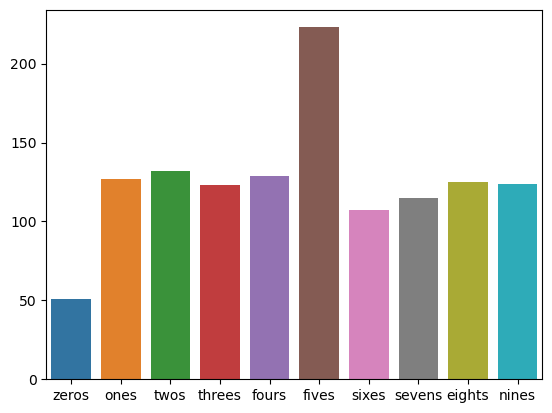

In [65]:
sns.barplot(x = ['zeros','ones','twos','threes','fours','fives','sixes','sevens',
                 'eights','nines'],
    y=[51, 127, 132, 123, 129, 223, 107, 115, 125, 124])

In [66]:
spy_digit_counts = digit_counts(last_digit(spy_prices))
spy_digit_counts

[13, 147, 154, 140, 145, 127, 122, 146, 126, 136]

In [67]:
import seaborn as sns

<Axes: >

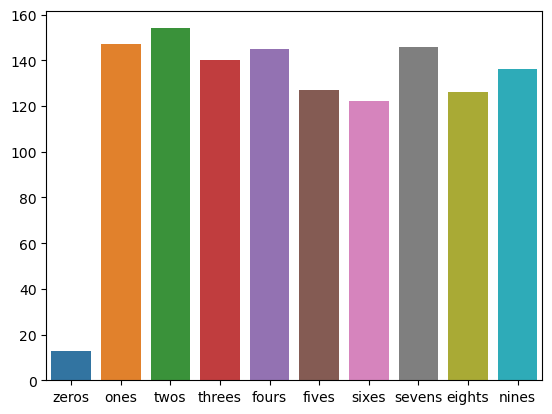

In [68]:
sns.barplot(x = ['zeros','ones','twos','threes','fours','fives','sixes','sevens',
                 'eights','nines'],
    y=[13, 147, 154, 140, 145, 127, 122, 146, 126, 136])

<Axes: >

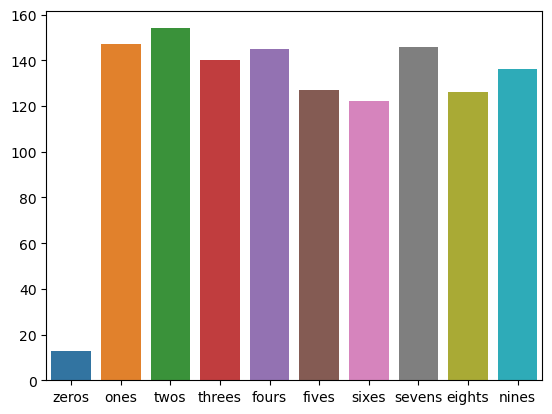

In [69]:
sns.barplot(x = ['zeros','ones','twos','threes','fours','fives','sixes','sevens',
                 'eights','nines'],
    y=[13, 147, 154, 140, 145, 127, 122, 146, 126, 136])

In [70]:
print('all code runs!')

all code runs!
